Lowering the Gaussian potential will reach a point where there is a bound state. Where is this?

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import scipy.sparse.linalg as spla

hbar = 1.0
m = 1.0
x_min, x_max = -10.0, 10.0
N = 400
x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]


In [22]:
def gaussian_potential(V0, x, a):
    return -V0 * np.exp(-x**2 / (2 * a**2))


In [ ]:
def build_sparse_H(V, dx):
    coeff = -hbar**2 / (2 * m * dx**2)
    diagonals = [
        np.full(N, -2 * coeff) + V,
        np.full(N - 1, coeff),
        np.full(N - 1, coeff)
    ]
    return sp.diags(diagonals, [0, 1, -1], format="csr")

In [31]:
def plot_ground_energy_vs_V0(a=1.0):
    V0_values = np.linspace(0.01, 0.2, 100)
    ground_energies = []

    for V0 in V0_values:
        V = gaussian_potential(V0, x, a)
        H = build_sparse_H(V, dx)
        eigs = spla.eigsh(H, k=1, which='SA', return_eigenvectors=False)
        ground_energies.append(eigs[0])

    for i, E in enumerate(ground_energies):
        if E < 0:
            critical_V0 = V0_values[i]
            break

    plt.figure(figsize=(8, 5))
    plt.plot(V0_values, ground_energies, label="Ground State Energy")
    plt.axhline(0, color='gray', linestyle='--', label="E = 0")
    plt.axvline(critical_V0, color='red', linestyle='--', label=f"Critical V₀ ≈ {critical_V0:.3f}")
    plt.xlabel("V₀ (Potential Depth)")
    plt.ylabel("Ground State Energy")
    plt.title(f"Ground State Energy vs V₀ (a = {a})")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
def find_critical_V0(a_list, V0_range=np.linspace(0.01, 1.0, 100)):
    critical_V0s = []
    for a in a_list:
        for V0 in V0_range:
            V = gaussian_potential(V0, x, a)
            H_sparse = build_sparse_H(V, dx)
            eigs = spla.eigsh(H_sparse, k=1, which='SA', return_eigenvectors=False)
            if eigs[0] < 0:
                critical_V0s.append(V0)
                break
    return critical_V0s

In [26]:
def plot_wavefunction(V0, a):
    V = gaussian_potential(V0, x, a)
    H_sparse = build_sparse_H(V, dx)
    eigval, eigvec = spla.eigsh(H_sparse, k=1, which='SA')
    psi = eigvec[:, 0]
    psi_norm = psi / np.sqrt(np.sum(np.abs(psi)**2) * dx)
    prob_density = np.abs(psi_norm)**2

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.plot(x, psi_norm, label="ψ₀(x)", color="blue")
    ax1.plot(x, prob_density, label="|ψ₀(x)|²", color="purple", linestyle='--')
    ax1.set_ylabel("Wavefunction / Probability Density", color="blue")
    ax1.set_xlabel("x")
    ax1.legend(loc="upper right")

    ax2 = ax1.twinx()
    ax2.plot(x, V, color="gray", linestyle=":", label="V(x)")
    ax2.set_ylabel("Potential V(x)", color="gray")
    ax2.legend(loc="lower right")

    plt.title(f"Wavefunction and Potential (a={a}, V₀={V0})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


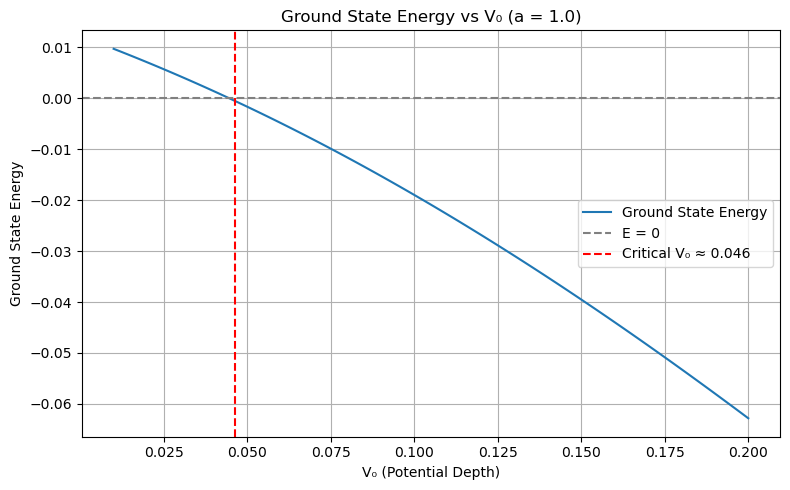

In [ ]:
# Plot Ground State Energy vs V0
plot_ground_energy_vs_V0(a=1.0)

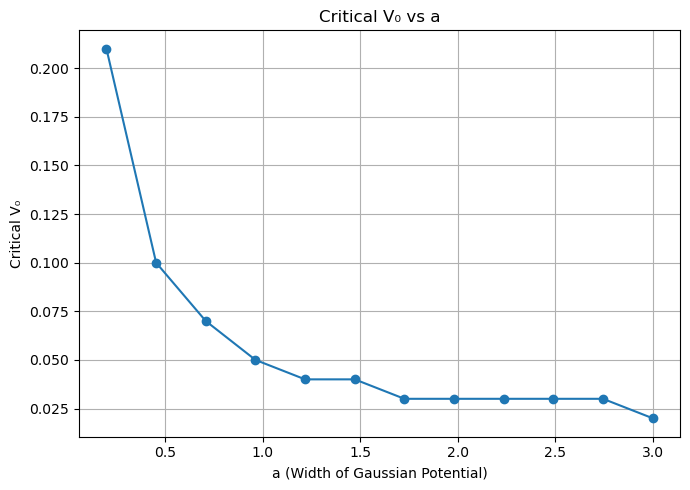

In [ ]:
# Critical V0 vs a
a_list = np.linspace(0.2, 3.0, 12)
critical_V0s = find_critical_V0(a_list)

plt.figure(figsize=(7, 5))
plt.plot(a_list, critical_V0s, marker='o')
plt.xlabel("a (Width of Gaussian Potential)")
plt.ylabel("Critical V₀")
plt.title("Critical V₀ vs a")
plt.grid(True)
plt.tight_layout()
plt.show()


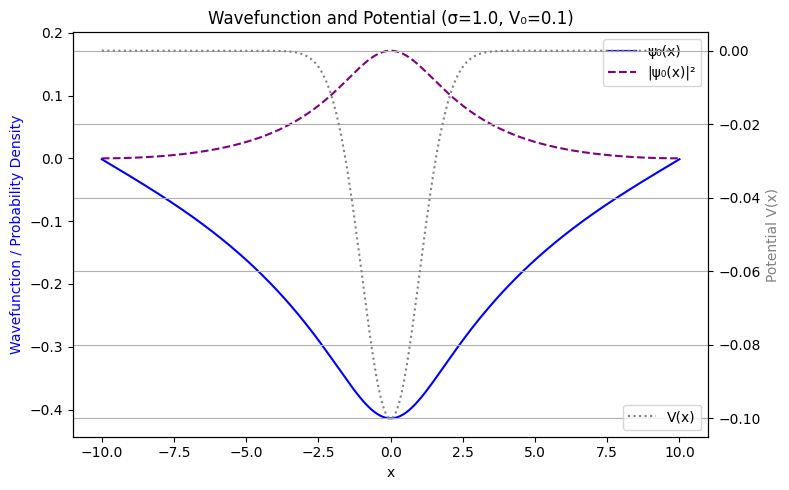

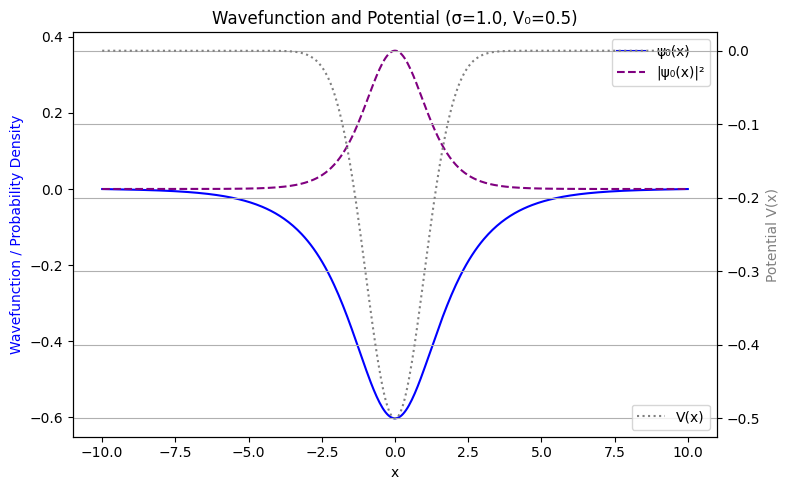

In [ ]:
# Part 3: Wave function for V0=0.1, a=1.0
plot_wavefunction(V0=0.1, a=1.0)
plot_wavefunction(V0=0.5, a=1.0)


count the number of bound states vs V0'=V0/(h^2/(m*sigma^2))